In [36]:
# Bearing Fault Detection using Vibration Analysis

## Project Overview
#This project focuses on detecting bearing faults in rotating machinery using vibration sensor data.
#Raw high-frequency vibration signals were converted into meaningful statistical features and used
#to build an explainable machine learning model for fault classification.

import zipfile

zip_path = "big_data_set.zip"

with zipfile.ZipFile(zip_path, "r") as zip_ref:
    file_list = zip_ref.namelist()
    
    print("Files inside the ZIP:")
    for file in file_list:
        print(file)


Files inside the ZIP:
current_ball_5.csv
current_ball_6.csv
current_inner_5.csv
current_inner_6.csv
current_normal_5.csv
current_normal_6.csv
current_outer_5.csv
current_outer_6.csv
rpm_ball_5.csv
rpm_ball_6.csv
rpm_inner_5.csv
rpm_inner_6.csv
rpm_normal_5.csv
rpm_normal_6.csv
rpm_outer_5.csv
rpm_outer_6.csv
vibration_ball_5.csv
vibration_ball_6.csv
vibration_inner_5.csv
vibration_inner_6.csv
vibration_normal_5.csv
vibration_normal_6.csv
vibration_outer_5.csv
vibration_outer_6.csv


In [4]:
import zipfile
import pandas as pd

zip_path = "big_data_set.zip"
file_name = "vibration_ball_5.csv"

chunk_size = 200_000

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        for chunk in pd.read_csv(f, chunksize=chunk_size):
            print(chunk.head())
            break   # just preview first chunk


   bearingA_x  bearingA_y  bearingB_x  bearingB_y
0    0.169654   -0.000263   -0.000029   -0.070917
1    0.133248    0.038306   -0.016522   -0.038857
2    0.108891   -0.008792   -0.039993   -0.056690
3    0.085831   -0.025950   -0.034731   -0.044696
4    0.030813    0.040728   -0.031341    0.001890


In [2]:
import zipfile
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

zip_path = "big_data_set.zip"
file_name = "vibration_ball_5.csv"

window_size = 2048   # samples per window
step_size = 2048     # non-overlapping windows

features = []

with zipfile.ZipFile(zip_path) as z:
    with z.open(file_name) as f:
        reader = pd.read_csv(f, chunksize=window_size)

        for chunk in reader:
            if len(chunk) < window_size:
                continue

            row = {}

            for col in chunk.columns:
                data = chunk[col].values

                row[f"{col}_mean"] = np.mean(data)
                row[f"{col}_rms"] = np.sqrt(np.mean(data**2))
                row[f"{col}_std"] = np.std(data)
                row[f"{col}_ptp"] = np.ptp(data)
                row[f"{col}_kurtosis"] = kurtosis(data)

            row["FaultType"] = "ball"
            row["Machine"] = 5

            features.append(row)

final_df = pd.DataFrame(features)
final_df.to_csv("vibration_features_ball_5.csv", index=False)

print("Feature extraction completed")


Feature extraction completed


In [3]:
import zipfile
import pandas as pd
import numpy as np
from scipy.stats import kurtosis

zip_path = "big_data_set.zip"

files = [
    "vibration_normal_5.csv",
    "vibration_ball_5.csv",
    "vibration_inner_5.csv",
    "vibration_outer_5.csv"
]

window_size = 2048
all_features = []

for file in files:

    fault = file.split("_")[1]
    machine = file.split("_")[2].replace(".csv","")

    with zipfile.ZipFile(zip_path) as z:
        with z.open(file) as f:
            reader = pd.read_csv(f, chunksize=window_size)

            for chunk in reader:
                if len(chunk) < window_size:
                    continue

                row = {}
                for col in chunk.columns:
                    data = chunk[col].values

                    row[f"{col}_mean"] = np.mean(data)
                    row[f"{col}_rms"] = np.sqrt(np.mean(data**2))
                    row[f"{col}_std"] = np.std(data)
                    row[f"{col}_ptp"] = np.ptp(data)
                    row[f"{col}_kurtosis"] = kurtosis(data)

                row["FaultType"] = fault
                row["Machine"] = machine
                all_features.append(row)

final_df = pd.DataFrame(all_features)
final_df.to_csv("vibration_features_machine5.csv", index=False)

print("Master dataset created")


Master dataset created


In [4]:
import pandas as pd

df = pd.read_csv("vibration_features_machine5.csv")

print(df.shape)
print(df["FaultType"].value_counts())
print(df.head())


(15000, 22)
FaultType
normal    3750
ball      3750
inner     3750
outer     3750
Name: count, dtype: int64
   bearingA_x_mean  bearingA_x_rms  bearingA_x_std  bearingA_x_ptp  \
0        -0.000501        0.052112        0.052109        0.372083   
1        -0.000494        0.051363        0.051360        0.324699   
2        -0.000758        0.048680        0.048674        0.315389   
3        -0.000358        0.047808        0.047806        0.321230   
4        -0.000586        0.054485        0.054482        0.367196   

   bearingA_x_kurtosis  bearingA_y_mean  bearingA_y_rms  bearingA_y_std  \
0             0.088077        -0.003589        0.037867        0.037696   
1             0.045238        -0.003520        0.057819        0.057712   
2             0.036231        -0.003729        0.059338        0.059220   
3             0.052677        -0.003507        0.049901        0.049778   
4            -0.145692        -0.003517        0.039943        0.039788   

   bearingA_y_ptp  b

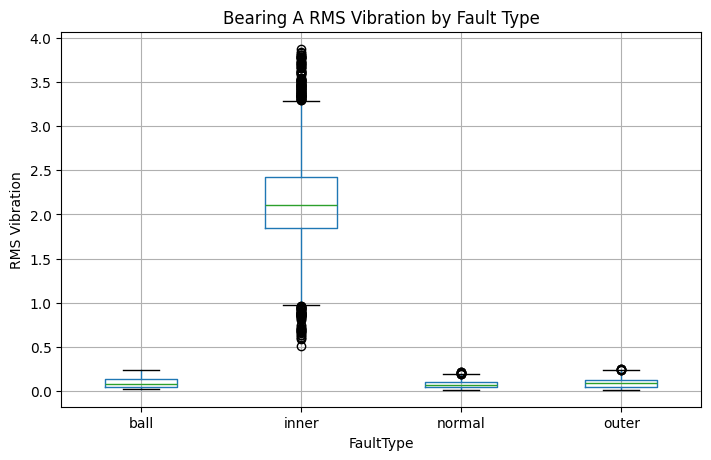

In [5]:
import matplotlib.pyplot as plt

df.boxplot(
    column="bearingA_x_rms",
    by="FaultType",
    figsize=(8,5)
)

plt.title("Bearing A RMS Vibration by Fault Type")
plt.suptitle("")
plt.ylabel("RMS Vibration")
plt.show()


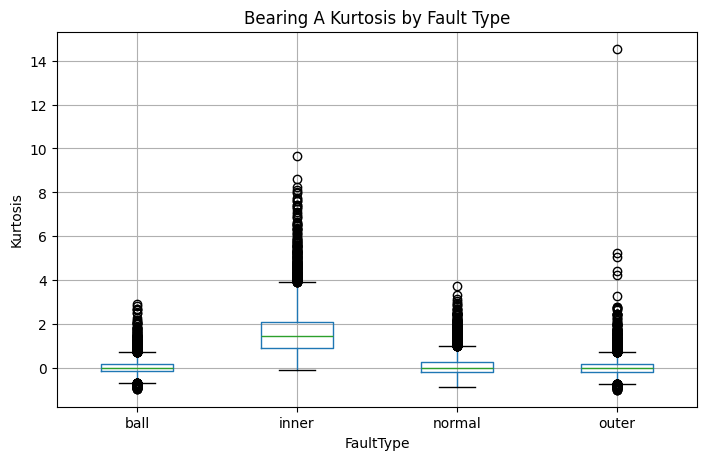

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("vibration_features_machine5.csv")

df.boxplot(
    column="bearingA_x_kurtosis",
    by="FaultType",
    figsize=(8,5)
)

plt.title("Bearing A Kurtosis by Fault Type")
plt.suptitle("")
plt.ylabel("Kurtosis")
plt.show()


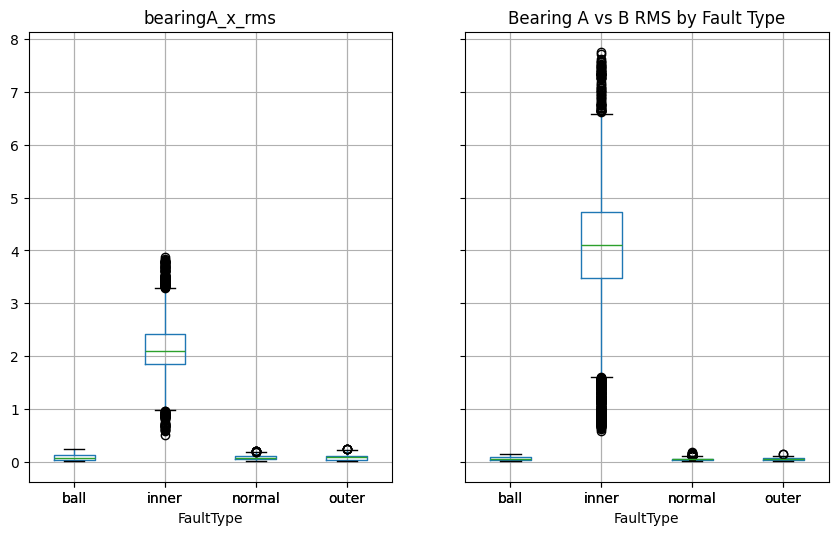

In [7]:
df.boxplot(
    column=["bearingA_x_rms", "bearingB_x_rms"],
    by="FaultType",
    figsize=(10,6)
)

plt.title("Bearing A vs B RMS by Fault Type")
plt.suptitle("")
plt.ylabel("RMS Vibration")
plt.show()


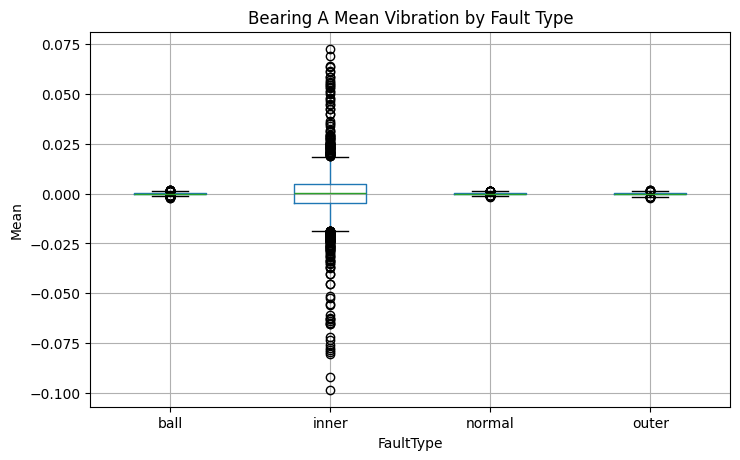

In [8]:
df.boxplot(
    column="bearingA_x_mean",
    by="FaultType",
    figsize=(8,5)
)

plt.title("Bearing A Mean Vibration by Fault Type")
plt.suptitle("")
plt.ylabel("Mean")
plt.show()


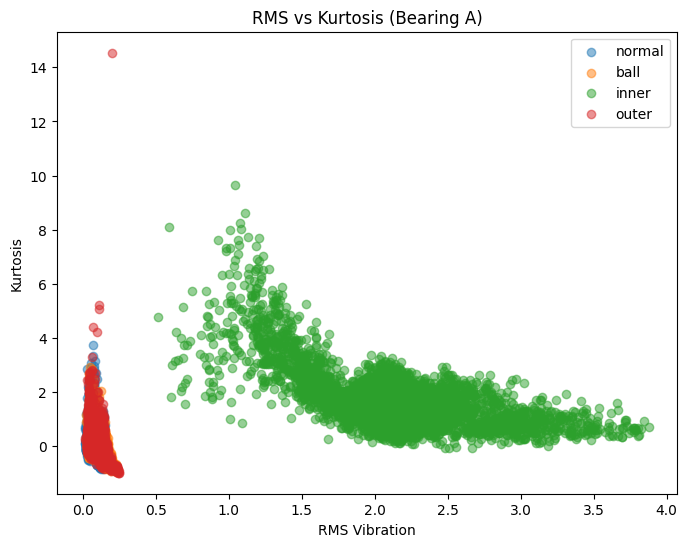

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

for fault in df["FaultType"].unique():
    subset = df[df["FaultType"] == fault]
    plt.scatter(
        subset["bearingA_x_rms"],
        subset["bearingA_x_kurtosis"],
        label=fault,
        alpha=0.5
    )

plt.xlabel("RMS Vibration")
plt.ylabel("Kurtosis")
plt.title("RMS vs Kurtosis (Bearing A)")
plt.legend()
plt.show()


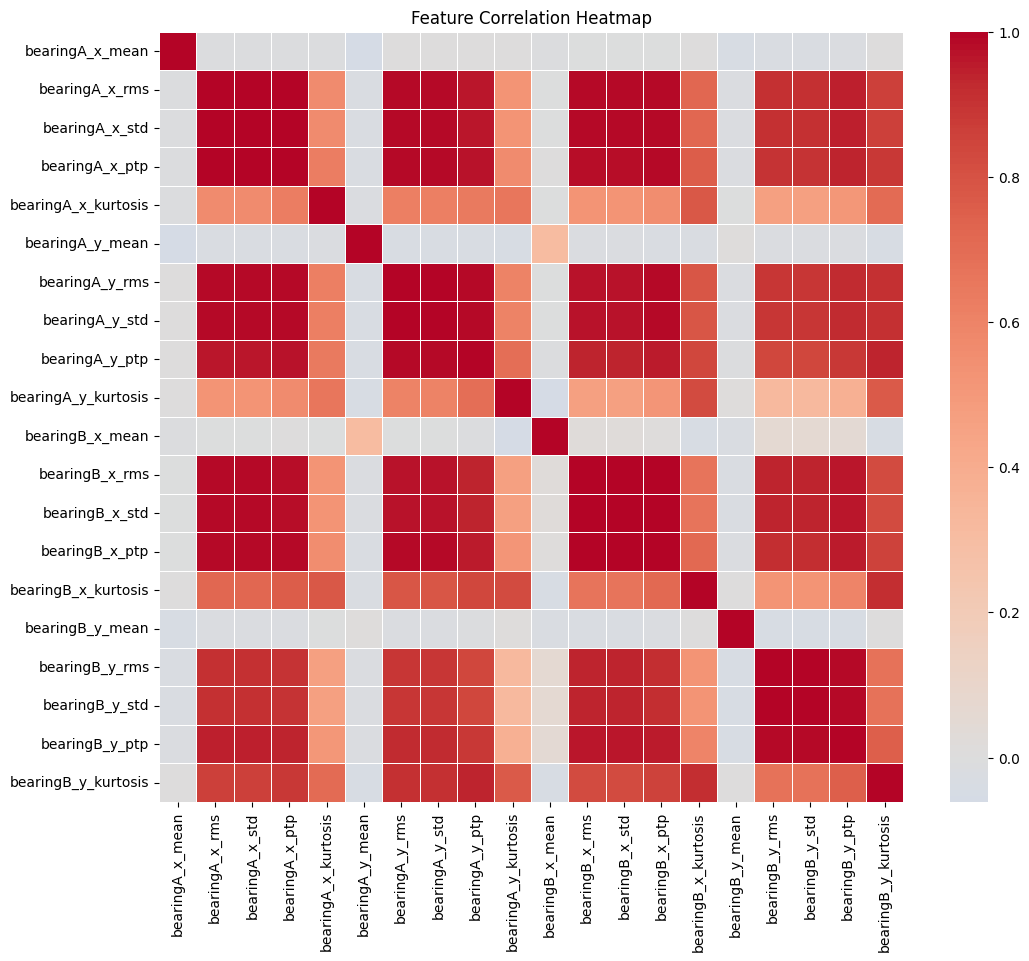

In [13]:
#Building Corellational Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("vibration_features_machine5.csv")

# Select only numeric features
numeric_df = df.drop(columns=["FaultType", "Machine"])

plt.figure(figsize=(12,10))
sns.heatmap(
    numeric_df.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Feature Correlation Heatmap")
plt.show()


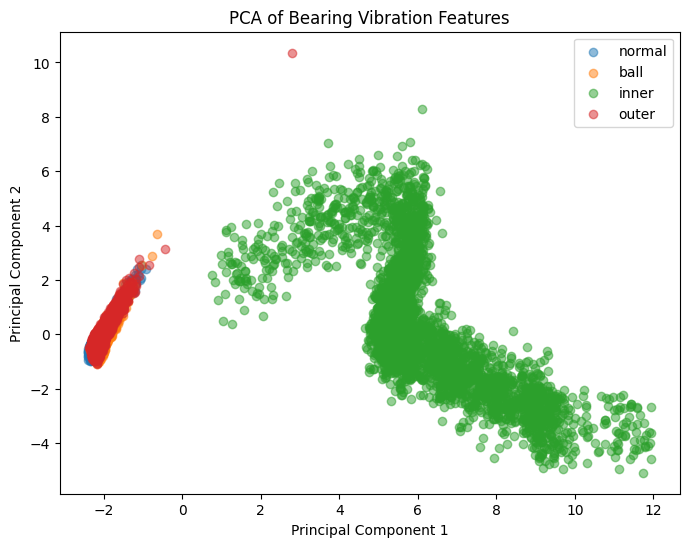

In [14]:
#PCA Visualisation 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X = numeric_df.values
y = df["FaultType"]

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))

for fault in y.unique():
    plt.scatter(
        X_pca[y == fault, 0],
        X_pca[y == fault, 1],
        label=fault,
        alpha=0.5
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Bearing Vibration Features")
plt.legend()
plt.show()


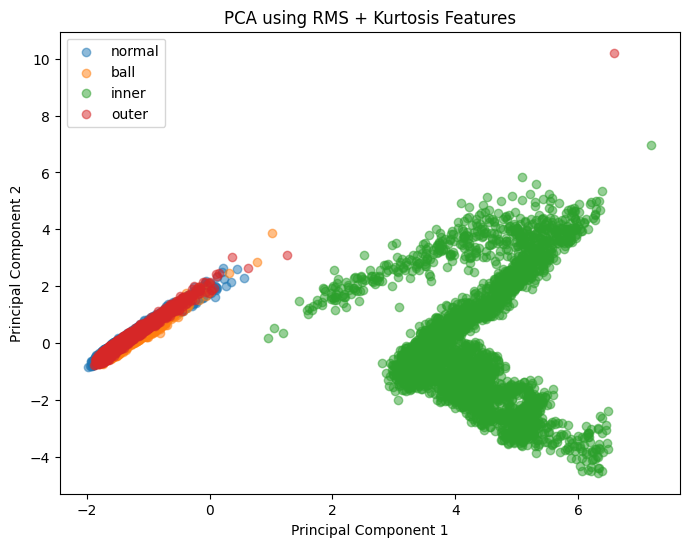

In [16]:
#PCA visualization keeping only RMS and Kurtosis 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load data
df = pd.read_csv("vibration_features_machine5.csv")

# Select only RMS and Kurtosis features
selected_cols = [col for col in df.columns if ("_rms" in col or "_kurtosis" in col)]
X = df[selected_cols]
y = df["FaultType"]

# Standardize
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
for fault in y.unique():
    plt.scatter(
        X_pca[y == fault, 0],
        X_pca[y == fault, 1],
        label=fault,
        alpha=0.5
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA using RMS + Kurtosis Features")
plt.legend()
plt.show()


In [17]:
#ML Model

In [18]:
#Preparing the Data Neat and Clean 
import pandas as pd

# Load dataset
df = pd.read_csv("vibration_features_machine5.csv")

# Select features
feature_cols = [col for col in df.columns if ("_rms" in col or "_kurtosis" in col)]
X = df[feature_cols]
y = df["FaultType"]

print(X.shape)
print(y.value_counts())


(15000, 8)
FaultType
normal    3750
ball      3750
inner     3750
outer     3750
Name: count, dtype: int64


In [20]:
#Training or Testing Splits 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [22]:
#Train the model random forest 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight="balanced"
)

model.fit(X_train_scaled, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [24]:
#Evaluate the model 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.9152

Classification Report:

              precision    recall  f1-score   support

        ball       0.94      0.92      0.93       938
       inner       1.00      1.00      1.00       937
      normal       0.86      0.89      0.88       938
       outer       0.86      0.85      0.85       937

    accuracy                           0.92      3750
   macro avg       0.92      0.92      0.92      3750
weighted avg       0.92      0.92      0.92      3750



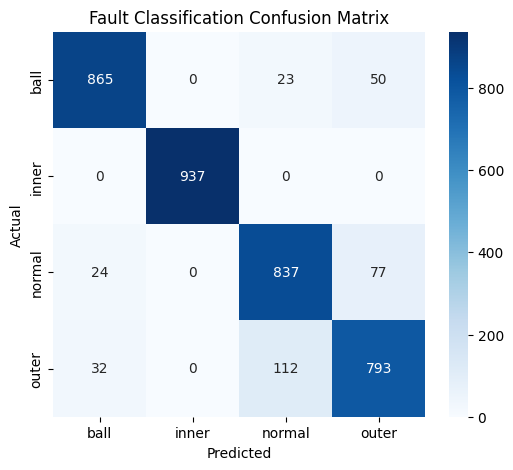

In [26]:
#Confusion Metrix 
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Fault Classification Confusion Matrix")
plt.show()


In [28]:
#featuring Importance 
importances = pd.Series(
    model.feature_importances_,
    index=feature_cols
).sort_values(ascending=False)

print(importances.head(10))


bearingB_y_kurtosis    0.220943
bearingB_y_rms         0.155696
bearingB_x_rms         0.151988
bearingA_y_rms         0.150021
bearingA_x_rms         0.123032
bearingB_x_kurtosis    0.098528
bearingA_x_kurtosis    0.051735
bearingA_y_kurtosis    0.048057
dtype: float64


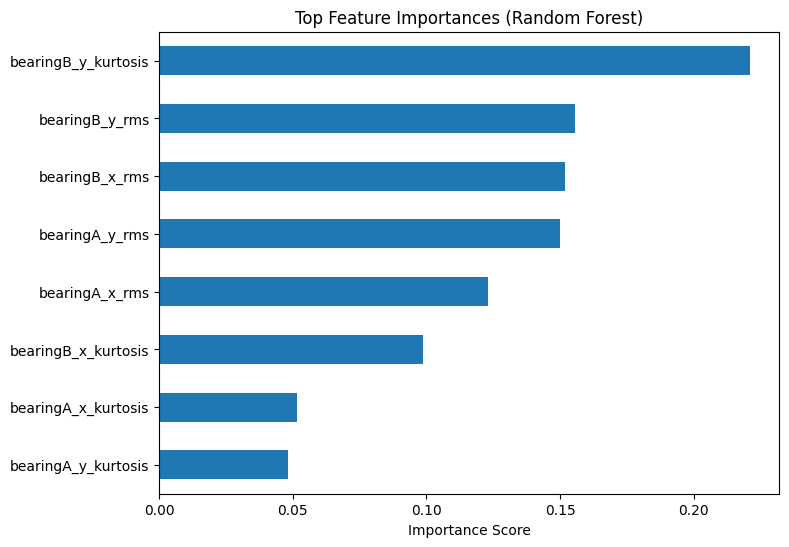

In [29]:
#Feature Importance Visulaization
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance
importances = pd.Series(
    model.feature_importances_,
    index=feature_cols
).sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,6))
importances.tail(10).plot(kind="barh")
plt.xlabel("Importance Score")
plt.title("Top Feature Importances (Random Forest)")
plt.show()


In [30]:
#Class Probablity Analysis - Predict Probability
# Predict probabilities
y_prob = model.predict_proba(X_test_scaled)

prob_df = pd.DataFrame(
    y_prob,
    columns=model.classes_
)

# Attach actual labels
prob_df["Actual"] = y_test.reset_index(drop=True)


In [32]:
#Analyse Confidence Per Plot 
confidence_summary = prob_df.groupby("Actual").mean()
print(confidence_summary)


            ball     inner    normal     outer
Actual                                        
ball    0.844104  0.000000  0.061162  0.094733
inner   0.000037  0.999941  0.000000  0.000021
normal  0.068870  0.000000  0.729835  0.201295
outer   0.090480  0.000203  0.195128  0.714189


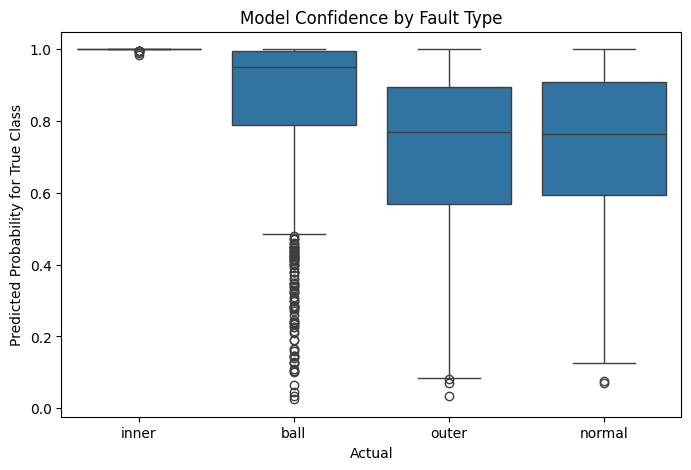

In [35]:
#Confidence Distribution Visualisation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


prob_df = pd.DataFrame(
    y_prob,
    columns=model.classes_
)

prob_df["Actual"] = y_test.reset_index(drop=True)

prob_df["TrueClassProb"] = prob_df.apply(
    lambda row: row[row["Actual"]],
    axis=1
)

plt.figure(figsize=(8,5))
sns.boxplot(
    x="Actual",
    y="TrueClassProb",
    data=prob_df
)

plt.ylabel("Predicted Probability for True Class")
plt.title("Model Confidence by Fault Type")
plt.show()
